## Amazon case study

In [1]:
### Importing Libraries

In [2]:
import nltk

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
## Loading dataset

In [5]:
reviews = pd.read_csv("K8 Reviews v0.2.csv")
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [6]:
reviews.shape

(14675, 2)

In [7]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

- If the rating given by the customer is 1,2,3 => sentiment is 0(negative sentiments)
- If the rating given by the customer 4 and 5 => sentiment is 1(Positive sentiments)

In [8]:
from wordcloud import WordCloud

In [9]:
reviews_combined = " ".join(reviews.review.values)

- In the above code we join all the commnents and make it a single string to do some processing on it.

In [10]:
#reviews_combined

In [11]:
## Example

In [12]:
str = ["hi","hello","how are you"]
" ".join(str)

'hi hello how are you'

In [13]:
reviews_combined[:100]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hel'

In [14]:
reviews_combined[:101]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell'

In [15]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [16]:
##Ploting wordcloud 

In [17]:
word_cloud = WordCloud(width = 800,height= 800, max_words=150).generate(reviews_combined).generate_from_text(reviews_combined)

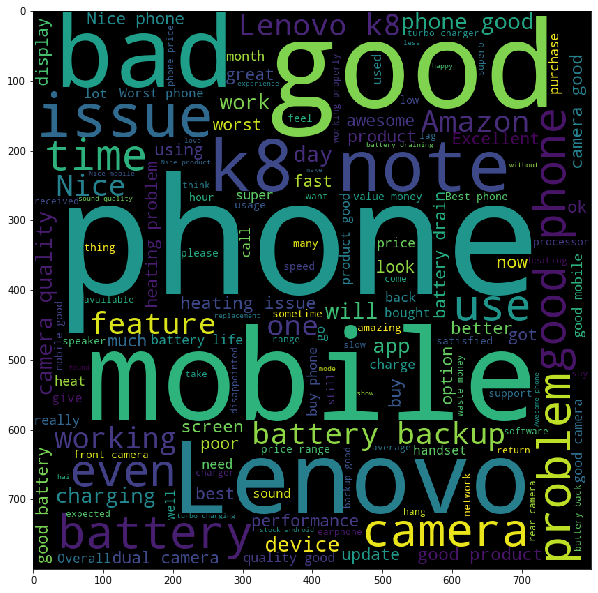

In [18]:
plt.figure(figsize=(10,12))
plt.imshow(word_cloud)
plt.show()

### Getting frequency count

In [19]:
lst = []
for i in reviews.review:
    lst.extend(i.split(" ")) ### here we are .extend commond of list as we are adding multiple words at a time

In [20]:
#lst

In [21]:
## Creating frequency counts of the words

In [22]:
wordfreq = {}                         
for w in lst:
    wordfreq[w] = wordfreq.get(w,0)+1


In [23]:
#wordfreq


In [24]:
#wordfreq.items()  # it will give list of tuple of the frequency count of the words

In [25]:
#wordfreq.keys()

In [26]:
#wordfreq.values()

### creating dataframe

In [27]:
df = pd.DataFrame(list(wordfreq.items()),columns=['word','freq'])
df

,word,freq
0,Good,1315
1,but,2222
2,need,196
3,updates,98
4,and,5078
...,...,...
30315,prosecer,1
30316,whater,1
30317,Gaget..,1
30318,mod,1


In [28]:
### Ploting bar graph of the frequency count of top 25 words

<Figure size 1080x864 with 0 Axes>

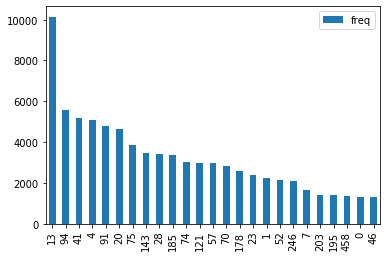

In [29]:
plt.figure(figsize=(15,12))
#%matplotlib inline
df1 = df.sort_values(ascending=False,by='freq').head(25)
df1.plot(kind='bar')

In [30]:
### Ploting bar graph of the frequency count of top 25 words using seaborn

In [31]:
import seaborn as sns

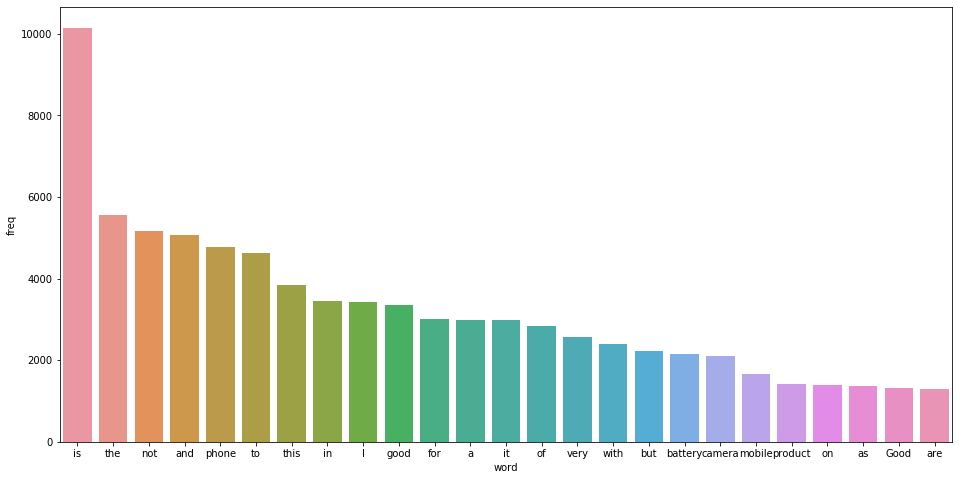

In [32]:
plt.figure(figsize=(16,8))
sns.barplot(x=df1.word, y=df1.freq)


### Using Cleaning techniques

- Problems with the above values
    - 1. case is non uniform
    - 2. punctuations and stop words
    - 3. words with diffrent tense forms like charged, charging, charges has its root from in charge

In [33]:
from nltk.tokenize import word_tokenize

In [34]:
all_items = word_tokenize(reviews_combined.lower())
#all_items

In [35]:
print(all_items[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [36]:
###ploting frequency graph directly using nltk

from nltk.probability import FreqDist

In [37]:
fdist = FreqDist(all_items)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

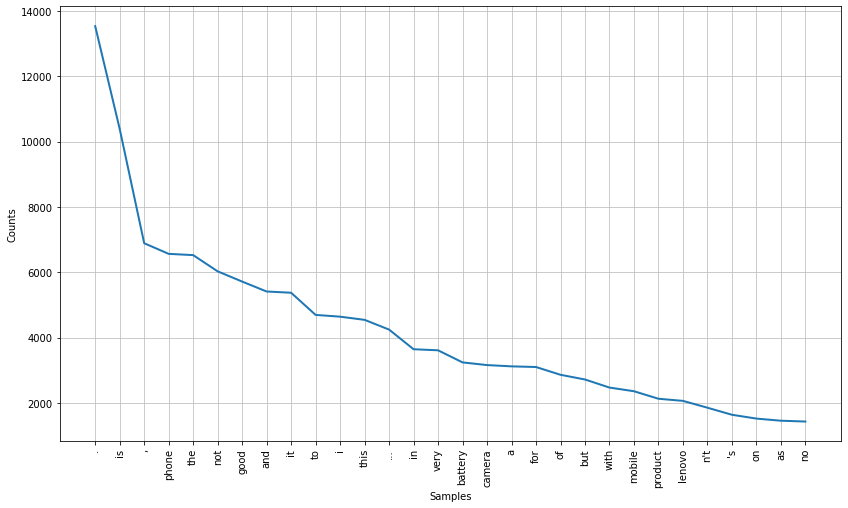

In [38]:
plt.figure(figsize=(14,8))
fdist.plot(30,cumulative=False)
plt.show()



###### : Note here in the curve the words in starting and last of the curve is not as usefull

- The most commonly used and the commonly used words in any language includes:
    - language connectors called stop words
    - punctuations

### Removing stopwords(most commonly used words) and punctuation

In [39]:
from string import punctuation
from nltk.corpus import stopwords

In [40]:
stop_nltk = stopwords.words("english")

In [41]:
stop_updated = stop_nltk + ['...','..','||'] + ["phone",'mobile','lenovo','k8','note','amazon',"n't"] 

In [42]:
reviews_updated1 = [term for term in all_items if term not in stop_updated and term not in list(punctuation) \
                   and len(term)>2]

In [43]:
# print(reviews_updated1)

In [44]:
len(reviews_updated1)

157325

### Lemmatization and Stemming

### Stemming

In [45]:
from nltk.stem import PorterStemmer, SnowballStemmer

In [46]:
stemmer_p = PorterStemmer()

In [47]:
%%time
ls_stem=[]
for i in reviews_updated1:
    ls_stem.append(stemmer_p.stem(i))
len(set(ls_stem))

Wall time: 5.04 s


16245

In [48]:
%%time
ls_snow=[]
stemmer_s = SnowballStemmer("english")
len(set([stemmer_s.stem(word) for word in reviews_updated1]))

Wall time: 3.71 s


16161

### Conculsion
    - 1. stemmer helps to reduce the number of distinct words in the corpus
    - 2. Lemmetizer helps to retain the meaning of the words effectively used when the context of the word is important
    - 3. Stemmer is used when I have an intent of getting lesser words which inturn reduces the total number of features

In [49]:
# Combine all the steps and create a udf
# takes one review as input and returns a cleaned review as a string

def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens
              if term not in stop_updated and 
              term not in list(punctuation) and len(term) > 2]
    res = " ".join(stemmed)
    return res

In [50]:
### Adding a column name Clean_review into our original dataframe

In [51]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [52]:
reviews

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...
...,...,...,...
14670,1,"I really like the phone, Everything is working...",realli like everyth work fine whater use
14671,1,The Lenovo K8 Note is awesome. It takes best p...,awesom take best pictur dual camera slim metal...
14672,1,Awesome Gaget.. @ this price,awesom gaget.. price
14673,1,This phone is nice processing will be successf...,nice process success dual camera success dual mod


In [53]:
new_reviews_combined = " ".join(reviews.clean_review.values)
# new_reviews_combined ### changing the clean text to a signle string

In [54]:
# all_items

In [55]:
fdist = FreqDist(all_items)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

### Removing the Punctuation and Stop words

In [56]:
from string import punctuation
from nltk.corpus import stopwords

In [57]:
stop_nltk = stopwords.words("english")

In [58]:
stop_updated1 = stop_nltk + ['...','..','||'] + ["phone",'mobile','lenovo','k8','note','amazon',"n't"]
# stop_updated1

In [59]:
## Removing "no", "not","nor"

In [60]:
for i in stop_updated1:
    if ((i == "no")|(i=='not')|(i=='nor')):
        stop_updated1.remove(i)

In [61]:
len(stop_updated1)

187

In [62]:
len(stop_nltk)

179

## Combined reviews

In [63]:
# print(reviews_combined)

In [64]:
doc = pd.DataFrame([new_reviews_combined],columns=['text'])
doc

,text
0,good need updat improv worst bought ever batte...


### Feature Exactraction

### Creating ngrams

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
## Creating Bi-grams

In [67]:
count_vectorizer_bg = CountVectorizer(ngram_range=(2, 2))
count_vectorizer_bg

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(2, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [68]:
X_bg = count_vectorizer_bg.fit_transform(doc['text'])### Apllying bigram on the doc dataframe and on column 'text'
X_bg

<1x87851 sparse matrix of type '<class 'numpy.int64'>'
	with 87851 stored elements in Compressed Sparse Row format>

### Creating Document term matrixof the bigrams

In [69]:
DTM_bg = pd.DataFrame(X_bg.toarray(),columns=count_vectorizer_bg.get_feature_names())
DTM_bg

,00 00,00 box,00 hour,00 realli,00 silent,00 usual,000 000,000 camera,000 charger,000 discount,...,இல பலம,என இயல,ஏற லல,ஒன என,கவ ஆடம,பரம இல,பலம ரண,ரண _smart,றப ஒன,லல becaus
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [70]:
DTM_bg.sum().sort_values(ascending=False).head(30) ## Taking top 30 words with highest frequency

batteri backup    593
batteri drain     490
camera qualiti    473
good product      406
heat issu         397
camera good       391
heat problem      340
good batteri      336
dual camera       298
drain fast        278
good good         277
batteri life      272
good camera       270
product good      255
work proper       234
qualiti good      231
get heat          225
valu money        210
wast money        190
front camera      189
call record       183
price rang        182
turbo charger     182
batteri back      177
turbo charg       176
also good         175
rear camera       168
buy product       161
nice product      155
perform good      146
dtype: int64

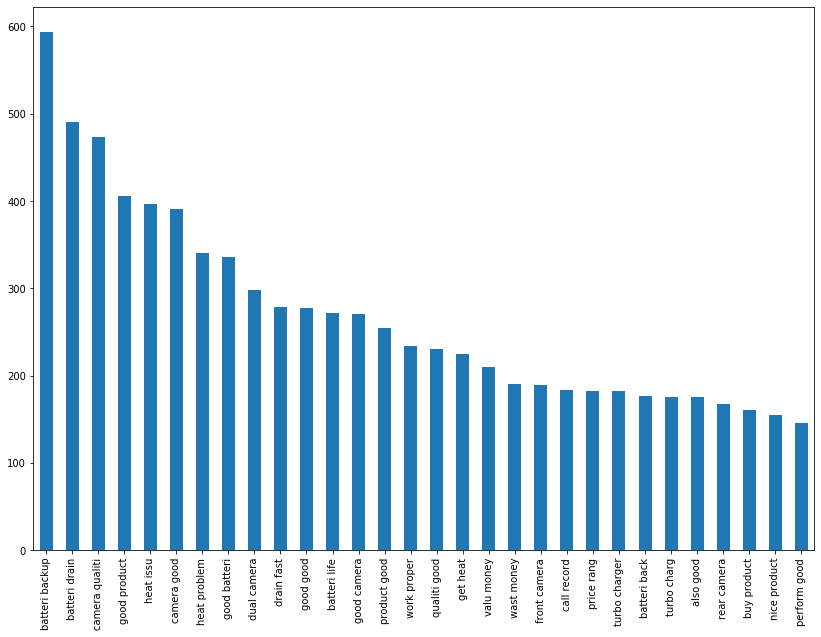

In [71]:
plt.figure(figsize=(14,10))
DTM_bg.sum().sort_values(ascending=False).head(30).plot(kind='bar') #taking top 30 words

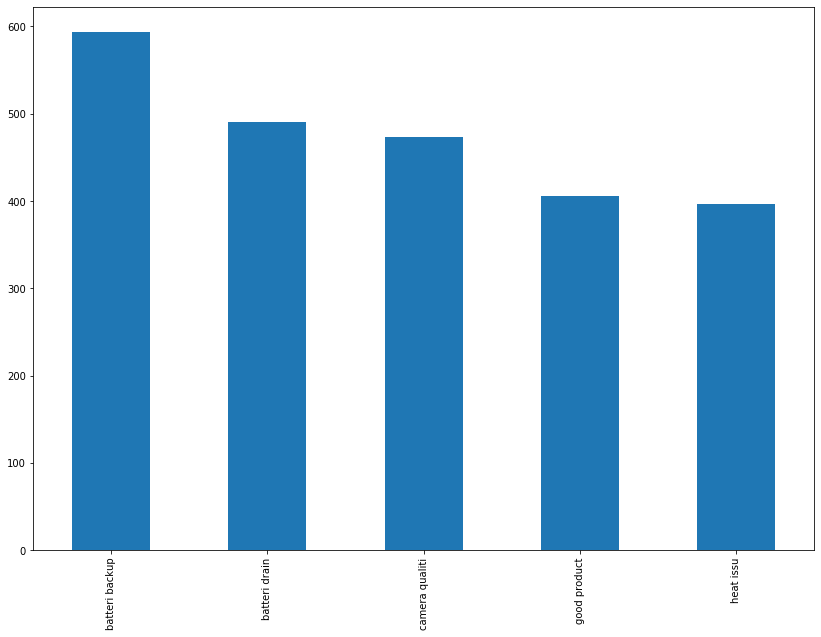

In [72]:
plt.figure(figsize=(14,10))
DTM_bg.sum().sort_values(ascending=False).head(5).plot(kind='bar')   #taking top 5 words

### Applying AFINN score

In [73]:
reviews

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...
...,...,...,...
14670,1,"I really like the phone, Everything is working...",realli like everyth work fine whater use
14671,1,The Lenovo K8 Note is awesome. It takes best p...,awesom take best pictur dual camera slim metal...
14672,1,Awesome Gaget.. @ this price,awesom gaget.. price
14673,1,This phone is nice processing will be successf...,nice process success dual camera success dual mod


# Sentiments Analysis:

In [74]:
afinn = pd.read_csv("AFINN-111.txt",sep="\t",header=None)
afinn.head()

,0,1
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [75]:
afinn.columns = ['Term','Score']
afinn.head()

,Term,Score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [76]:
term_scores = dict(afinn.values)
# term_scores

In [77]:
def get_sentiment(sent):
    score = 0
    tokens = word_tokenize(sent.lower())
    for term in tokens:
        score+= term_scores.get(term,0)
    return score

In [78]:
reviews['sent_score']  = reviews['clean_review'].apply(get_sentiment)

In [79]:
reviews.head()

,sentiment,review,clean_review,sent_score
0,1,Good but need updates and improvements,good need updat improv,3
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0
3,1,Good,good,3
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7


In [80]:
reviews['sent_prediction']  = reviews['sent_score'].apply(lambda x: 1 if x> 0 else 0)

In [81]:
## If the the sent score is positive value > than 1 then its "positive sentiment" otherwise 0 "negative sentiment" 

In [82]:
reviews

,sentiment,review,clean_review,sent_score,sent_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0
3,1,Good,good,3,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0
...,...,...,...,...,...
14670,1,"I really like the phone, Everything is working...",realli like everyth work fine whater use,4,1
14671,1,The Lenovo K8 Note is awesome. It takes best p...,awesom take best pictur dual camera slim metal...,2,1
14672,1,Awesome Gaget.. @ this price,awesom gaget.. price,0,0
14673,1,This phone is nice processing will be successf...,nice process success dual camera success dual mod,7,1


In [83]:
### Getting Accuracy Score between the Labels given(sentiment) in the dataset and between our sent_prediction value

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(reviews.sentiment,reviews.sent_prediction)

0.7118228279386712

### Sentiment precdiction Strategy 2: Using popular package - Vader

In [86]:
reviews.head(2)

,sentiment,review,clean_review,sent_score,sent_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0


In [87]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [88]:
analyser = SentimentIntensityAnalyzer()

In [89]:
def det_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound'] ## taking only the compound score

In [90]:
reviews['compund_score'] = reviews['review'].apply(det_vader_sentiment)

In [91]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,compund_score
0,1,Good but need updates and improvements,good need updat improv,3,1,0.5994
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,-0.8720
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,0.0000
3,1,Good,good,3,1,0.4404
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,-0.8289


In [92]:
## setting a threshold to make the compound score into 1-positive and 0-negative score

In [93]:
reviews['compound_prediction']  = reviews['compund_score'].apply(lambda x: 1 if x> 0.33 else 0)

In [94]:
reviews.head(2)

,sentiment,review,clean_review,sent_score,sent_prediction,compund_score,compound_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,-0.8720,0


In [95]:
## Now we can check accurary

In [96]:
accuracy_score(reviews.sentiment,reviews.compound_prediction)

0.8002725724020443

### Sentiment precdiction Strategy 2: Building our own model

In [97]:
X = reviews.clean_review ### Indepentent variable
Y = reviews.sentiment    ### Depentent variable

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 42)

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
count_vect = CountVectorizer()

In [101]:
X_train_bow = count_vect.fit_transform(x_train)  ###Note- here we will use .fit_transform()
X_train_bow

<10272x8521 sparse matrix of type '<class 'numpy.int64'>'
	with 101745 stored elements in Compressed Sparse Row format>

In [102]:
X_test_bow = count_vect.transform(x_test)  ### Note- here we will use only .transform() here so to keep the same number of 
                                           ###   features in both x_train, x_test  

X_test_bow

<4403x8521 sparse matrix of type '<class 'numpy.int64'>'
	with 41208 stored elements in Compressed Sparse Row format>

In [103]:
print(X_train_bow.shape,X_test_bow.shape)

(10272, 8521) (4403, 8521)


- Note X_train and X_test should always have same number of features in both of them

## Applying Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

In [105]:
logreg = LogisticRegression()
logreg.fit(X_train_bow,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
y_pred = logreg.predict(X_test_bow)

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Confusion Matrix",confusion_matrix(y_test, y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred)*100)

Confusion Matrix [[1932  379]
 [ 277 1815]]
Accuracy Score:  85.10106745400863


### Applying Naive's Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [109]:
gnb = GaussianNB()
gnb.fit(X_train_bow.toarray(),y_train)                                    # here .fit() which calculate probability

GaussianNB(priors=None, var_smoothing=1e-09)

In [110]:
y_pred1 = logreg.predict(X_test_bow)

In [111]:
print("Confusion Matrix", confusion_matrix(y_test, y_pred1))
print('\n')
print("Accuracy Score: ",accuracy_score(y_test,y_pred1)*100)

Confusion Matrix [[1932  379]
 [ 277 1815]]


Accuracy Score:  85.10106745400863


---

## Applying Clustering 

In [112]:
## Building mode

In [113]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,compund_score,compound_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,0.0000,0
3,1,Good,good,3,1,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,-0.8289,0


In [114]:
from sklearn.feature_extraction.text import CountVectorizer

In [115]:
#Instantize the count vectorizer

count_vectorizer = CountVectorizer()

In [116]:
#fit---> extracts the features as BOW
# transfrom --> computes the counts for every features extracted

X = count_vectorizer.fit_transform(reviews['clean_review'])
X

<14675x10697 sparse matrix of type '<class 'numpy.int64'>'
	with 145263 stored elements in Compressed Sparse Row format>

In [117]:
# count_vectorizer.get_feature_names()

In [118]:
# print(count_vectorizer.vocabulary_)    # gives the postion/index of the word in dtm

In [119]:
DTM = pd.DataFrame(X.toarray(),columns=count_vectorizer.get_feature_names())
DTM

,00,000,000000000,000mah,01,01_04_2018,02,02may,03,04,...,இல,என,ஏற,ஒன,கவ,பரம,பலம,ரண,றப,லல
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
### 1.) Use the score score_vader/compund_score column(which comprieses of the vader polarity scores) to label the lenovo K8 
# reviews as:
# >= -1 and < -0.5 :


In [121]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,compund_score,compound_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,0.0000,0
3,1,Good,good,3,1,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,-0.8289,0


In [122]:
len(reviews.compund_score)

14675

In [123]:
### Making multiclass label

In [124]:
compound_prediction_multi = []
for i in reviews.compund_score:
    if i >= -1 and i < -0.5:
        compound_prediction_multi.append("Very bad")
    elif (i >= -0.5) and (i < -0.2):
        compound_prediction_multi.append("Bad")
    elif (i >= -0.2) and (i<0.2):
        compound_prediction_multi.append("Netural")
    elif (i >= 0.2) and (i<0.5):
        compound_prediction_multi.append("Good")
    elif(i >= 0.5):
        compound_prediction_multi.append("Very good")
    
        
        

In [125]:
# compound_prediction_multi

In [126]:
reviews.shape

(14675, 7)

In [127]:
len(compound_prediction_multi)

14675

In [128]:
reviews['compound_prediction_multi_class'] = compound_prediction_multi

In [129]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,compund_score,compound_prediction,compound_prediction_multi_class
0,1,Good but need updates and improvements,good need updat improv,3,1,0.5994,1,Very good
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,-0.8720,0,Very bad
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,0.0000,0,Netural
3,1,Good,good,3,1,0.4404,1,Good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,-0.8289,0,Very bad


In [130]:
reviews = reviews.astype({"compound_prediction_multi_class": object})
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 8 columns):
sentiment                          14675 non-null int64
review                             14675 non-null object
clean_review                       14675 non-null object
sent_score                         14675 non-null int64
sent_prediction                    14675 non-null int64
compund_score                      14675 non-null float64
compound_prediction                14675 non-null int64
compound_prediction_multi_class    14675 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 917.3+ KB


In [131]:
type(reviews.compound_prediction_multi_class)

pandas.core.series.Series

## Another approach

bins = [-1,0.5,-0.2,0.2,0.5,1]

labels = ['very bad','']

## ## Another approach to create bins using numpy .digitize()

- import numpy as np

- senti_mappinig = {1:'Very Bad', 2: "bad", 3:'neutal',4:"good",5:'very good'}

- map_sentiment = lambda val : np.digitize(val,[-1,-0.5,-0.2,0.2, 0.5])

In [132]:
#reviews['sentiment_category'] = reviews['score_vader'].apply(map_sentiment)

In [133]:
#np.digitize(0.75,[-1,0.5,-0.2,0.2,0.5])

### 2) Use the labels to build a multi class classification model to predict the sentiment label of a customer review

In [134]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
reviews['taget'] = encoder.fit_transform(reviews.compound_prediction_multi_class)

In [135]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,compund_score,compound_prediction,compound_prediction_multi_class,taget
0,1,Good but need updates and improvements,good need updat improv,3,1,0.5994,1,Very good,4
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,-0.8720,0,Very bad,3
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,0.0000,0,Netural,2
3,1,Good,good,3,1,0.4404,1,Good,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,-0.8289,0,Very bad,3


In [136]:
## Building Model

In [137]:
X1 = reviews.clean_review
Y1 = reviews.compound_prediction_multi_class

In [138]:
from sklearn.feature_extraction.text import CountVectorizer

In [139]:
count_vect = CountVectorizer()

In [140]:
X_train_1 = count_vect.fit_transform(X1)  ###Note- here we will use .fit_transform()

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_1,Y1, test_size=0.3, random_state = 42)

In [142]:
#X_test_1 = count_vect.transform(x_test)  ### Note- here we will use only .transform() here so to keep the same number of features in 
                         #### both x_train, x_test  

In [143]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [144]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)                                    # here .fit() which calculate distances

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [145]:
y_pred1 = mnb.predict(x_test)

In [146]:
print("Confusion Matrix",confusion_matrix(y_test, y_pred1))
print('\n')
print("Accuracy Score: ",accuracy_score(y_test,y_pred1)*100)

Confusion Matrix [[  47   49   73  279  137]
 [   6  483   47   76  397]
 [  27  111  316  193  274]
 [  23   12   27  528  106]
 [   1   78   15   55 1043]]


Accuracy Score:  54.894390188507835


---

### Documents similarity

In [147]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,compund_score,compound_prediction,compound_prediction_multi_class,taget
0,1,Good but need updates and improvements,good need updat improv,3,1,0.5994,1,Very good,4
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,-0.8720,0,Very bad,3
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,0.0000,0,Netural,2
3,1,Good,good,3,1,0.4404,1,Good,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,-0.8289,0,Very bad,3


In [148]:
### For second review of the lenovo K8 get the top 5 similar reviews to the cosine similarity function

In [149]:
DTM.head()

,00,000,000000000,000mah,01,01_04_2018,02,02may,03,04,...,இல,என,ஏற,ஒன,கவ,பரம,பலம,ரண,றப,லல
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
## Similarity

In [151]:
from sklearn.metrics.pairwise import cosine_similarity

In [152]:
((cosine_similarity(DTM[2:3],DTM[1:])).flatten().argsort()[::-1])

array([    1,  2923, 12666, ...,  9501,  9500,  7336], dtype=int64)

In [153]:
sim_mat = cosine_similarity(DTM.T)
sim_mat = pd.DataFrame(sim_mat, columns = DTM.columns, index= DTM.columns)
print(sim_mat)
print(sim_mat.columns)

            00  000  000000000  000mah   01  01_04_2018   02  02may   03   04  \
00         1.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
000        0.0  1.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
000000000  0.0  0.0        1.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
000mah     0.0  0.0        0.0     1.0  0.0         0.0  0.0    0.0  0.0  0.0   
01         0.0  0.0        0.0     0.0  1.0         0.0  0.0    0.0  0.0  0.0   
...        ...  ...        ...     ...  ...         ...  ...    ...  ...  ...   
பரம        0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
பலம        0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
ரண         0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
றப         0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   
லல         0.0  0.0        0.0     0.0  0.0         0.0  0.0    0.0  0.0  0.0   

           ...   இல   என   

In [154]:
#understanding how the functions works
sim_mat['charge'].sort_values(ascending=False).drop('charge').head(5)

cameragorilla    0.204124
effect6          0.204124
restrict         0.204124
frome            0.204124
teami            0.204124
Name: charge, dtype: float64

In [155]:
#understanding how the functions works
sim_mat['batteri'].sort_values(ascending=False).drop('batteri').head(5)

drain     0.482576
backup    0.421632
fast      0.350015
charg     0.348609
camera    0.346514
Name: batteri, dtype: float64

In [156]:
cs = cosine_similarity(DTM.T)

In [157]:
def get_similar_words(input_word, sim_mat):
    cos_vals = sim_mat[input_word].sort_values(ascending=False)
    similar_words = cos_vals.drop(input_word).head(5)
    return similar_words

In [158]:
get_similar_words('drain',sim_mat)

batteri    0.482576
fast       0.446616
charg      0.231530
heat       0.220828
even       0.210655
Name: drain, dtype: float64

In [159]:
cs = cosine_similarity(DTM)

In [160]:
ind = reviews.compund_score.sort_values().head(1).index[0]
ind

8075

In [161]:
pd.DataFrame(reviews.values[cs[ind].argsort()[::-1][1:6]])

,0,1,2,3,4,5,6,7,8
0,1,waste,wast,0,0,-0.4215,0,Bad,0
1,0,Waste mobile phone,wast,0,0,-0.4215,0,Bad,0
2,0,Waste,wast,0,0,-0.4215,0,Bad,0
3,0,Waste mobile,wast,0,0,-0.4215,0,Bad,0
4,0,Wast,wast,0,0,0,0,Netural,2
